# 고령인구, 고령화지수, 비율과 공원 등 나들이, 시장 상관계수 구해보기

## Library import

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import googlemaps
import seaborn as sns
from matplotlib import rc
import warnings
import os

if os.name == 'nt':
    print("This is a Windows environment.")
    rc('font', family='Malgun Gothic')
elif os.name == 'posix':
    print("This is a Mac or Linux environment.")
    rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

warnings.filterwarnings("ignore", category=UserWarning)

This is a Mac or Linux environment.


### culture

In [205]:
# 노령화 지수
old_point = pd.read_excel('./data/자치구별+노령화지수(추계인구)_20240929181758.xlsx')
old_point.drop(index=[0, 1], columns=["자치구별(1)"], inplace=True)
old_point.columns = ['시군구', '합계', '남자', '여자']
old_point.reset_index(drop=True, inplace=True)
old_point.head()

,시군구,합계,남자,여자
0,종로구,267.8,237.3,298
1,중구,286.5,245.3,329.3
2,용산구,200.7,172.2,230
3,성동구,193.4,167.5,219.9
4,광진구,211.1,183.7,240.1


In [206]:
old_pop = pd.read_excel('./data/자치구별+연령계층별+인구구성비(추계인구)_20241108190613.xlsx')
old_pop.drop(index=[0, 1], inplace=True)
old_pop.columns = ['시군구', '유소년인구', '생산가능인구', '고령인구']
old_pop.reset_index(drop=True, inplace=True)
old_pop.head()

,시군구,유소년인구,생산가능인구,고령인구
0,종로구,7,74.1,18.9
1,중구,6.8,73.6,19.6
2,용산구,8.6,74.1,17.3
3,성동구,8.9,73.8,17.3
4,광진구,7.7,76.1,16.2


In [207]:
area = pd.read_excel('./data/행정구역(구별)_20241215143907.xlsx')
area.drop(columns='자치구별(1)', index=[0,2], inplace=True)
area.columns = area.loc[1, :]
area.drop(index=1, inplace=True)
area.reset_index(drop=True, inplace=True)
area.rename(columns={"자치구별(2)" : '시군구'}, inplace=True)
area.head()

1,시군구,면적 (km²),구성비 (%),행정,법정,소계,소계
0,종로구,23.91,3.95,17,87,279,1475
1,중구,9.96,1.65,15,74,256,1568
2,용산구,21.87,3.61,16,36,357,2599
3,성동구,16.82,2.78,17,17,471,3645
4,광진구,17.06,2.82,15,7,370,3012


In [208]:
area = area[['시군구', '면적 (km²)', '구성비 (%)']]
area.head()

1,시군구,면적 (km²),구성비 (%)
0,종로구,23.91,3.95
1,중구,9.96,1.65
2,용산구,21.87,3.61
3,성동구,16.82,2.78
4,광진구,17.06,2.82


In [209]:
pop = pd.read_excel('./data/자치구별+고령인구(추계인구)_20241019165325.xlsx')
pop.head()

,자치구별(1),자치구별(2),2023,2023.1,2023.2
0,자치구별(1),자치구별(2),고령인구,고령인구,고령인구
1,자치구별(1),자치구별(2),소계,남자,여자
2,합계,소계,1691853,749118,942735
3,NaN,종로구,27187,11986,15201
4,NaN,중구,24374,10637,13737


In [210]:
pop.drop(index=[0, 1, 2], columns=['자치구별(1)'], inplace=True)
pop.columns = ["시군구", "노령인구_전체", "노령인구_남자", "노령인구_여자"]
pop.reset_index(drop=True, inplace=True)

In [211]:
market = pd.read_csv('./data/소상공인시장진흥공단_전통시장현황_20240719.csv', encoding='cp949')
market.head()

,시장코드,시장명,시장 유형,지번주소,도로명주소,시도,시군구,아케이드 보유 여부,엘리베이터_에스컬레이터_보유여부,고객지원센터 보유 여부,...,쇼핑카트_보유여부,외국인 안내센터_보유여부,고객동선통로_보유여부,방송센터_보유여부,문화교실_보유여부,공동물류창고_보유여부,시장전용 고객주차장_보유여부,교육장_보유여부,회의실_보유여부,자동심장충격기_보유여부
0,b31370001,설악눈메골시장,전통시장,경기도 가평군 설악면 신천리 413-14,경기도 가평군 설악면 신천중앙로 104-1,경기도,가평군,N,N,N,...,N,N,N,N,N,N,Y,Y,Y,N
1,a31370001,가평잣고을시장,전통시장,경기도 가평군 읍내리 405,경기도 가평군 가평읍 장터2길12 204호,경기도,가평군,Y,N,Y,...,N,N,Y,Y,N,Y,Y,Y,Y,N
2,a31370007,청평여울시장,전통시장,경기도 가평군 청평면 청평리 81-2,경기도 가평군 청평면 시장중앙로19,경기도,가평군,Y,Y,N,...,N,N,N,N,N,N,Y,N,Y,N
3,a31100001,원당시장,전통시장,경기도 고양시 덕양구 성사동 697-14,경기도 고양시 덕양구 호국로 790번길 17,경기도,고양시,Y,N,Y,...,N,N,Y,Y,N,N,Y,Y,Y,Y
4,a31101001,능곡시장,전통시장,경기도 고양시 덕양구 토당동 347,경기도 고양시 덕양구 능곡로 12의 9,경기도,고양시,N,N,Y,...,Y,N,Y,Y,N,Y,Y,Y,Y,Y


In [212]:
market = market[market['시도'] == '서울특별시']

In [213]:
market = market['시군구'].value_counts().reset_index().rename(columns={'count' : '개수'})
market.head()

,시군구,개수
0,중구,25
1,동대문구,18
2,관악구,13
3,중랑구,12
4,강서구,9


In [214]:
park = pd.read_excel('./data/공원_20241218013757.xlsx')
park.head()

,자치구별(1),자치구별(2),공원수 (개소),(중복),면적 (천㎡),공원수 (개소).1,(중복).1,면적 (천㎡).1,공원수 (개소).2,(중복).2,...,면적 (천㎡).10,공원수 (개소).11,면적 (천㎡).11,공원수 (개소).12,면적 (천㎡).12,공원수 (개소).13,면적 (천㎡).13,공원수 (개소).14,(중복).5,면적 (천㎡).14
0,합계,소계,2984,57,173076.0,1,5,37517,2303,49,...,509,14,227.2,2,51.4,9,24.4,680,3,16250.4
1,NaN,종로구,106,5,11434.6,-,1,5030,69,4,...,113,-,-,-,-,-,-,37,-,168
2,NaN,중구,72,5,3204.7,-,-,-,56,5,...,34.4,-,-,-,-,-,-,16,-,88
3,NaN,용산구,107,4,1773.8,-,-,-,68,4,...,17.5,-,-,-,-,2,3.5,39,-,1016.4
4,NaN,성동구,105,1,3085.7,-,-,-,65,1,...,-,-,-,-,-,3,8.8,40,-,1854.7


In [215]:
park = park[['자치구별(2)', '공원수 (개소)']]
park.rename(columns={'자치구별(2)' : '시군구', '공원수 (개소)' : '공원수'}, inplace=True)
park.drop([0,26], inplace=True)
park = park.reset_index(drop=True)
park

,시군구,공원수
0,종로구,106
1,중구,72
2,용산구,107
3,성동구,105
4,광진구,68
5,동대문구,92
6,중랑구,108
7,성북구,123
8,강북구,87
9,도봉구,81


### old_point, old_pop, area, market, park

In [216]:
amenities = market.merge(right_on='시군구', left_on='시군구', right=park)
amenities = amenities.merge(right_on='시군구', left_on='시군구', right=old_point)
amenities = amenities.merge(right_on='시군구', left_on='시군구', right=old_pop)
amenities = amenities.merge(right_on='시군구', left_on='시군구', right=area)
amenities = amenities.merge(right_on='시군구', left_on='시군구', right=pop)
amenities

,시군구,개수,공원수,합계,남자,여자,유소년인구,생산가능인구,고령인구,면적 (km²),구성비 (%),노령인구_전체,노령인구_남자,노령인구_여자
0,중구,25,72,286.5,245.3,329.3,6.8,73.6,19.6,9.96,1.65,24374,10637,13737
1,동대문구,18,92,234.7,203.3,267.7,8,73.2,18.8,14.22,2.35,64397,28548,35849
2,관악구,13,134,300.5,257.4,346.4,5.8,76.9,17.3,29.57,4.89,84596,37422,47174
3,중랑구,12,108,246.4,213.8,281,8.1,71.9,20,18.5,3.06,75516,33708,41808
4,강서구,9,174,192.5,166,220.3,9.2,73,17.7,41.45,6.85,98380,43366,55014
5,종로구,9,106,267.8,237.3,298,7,74.1,18.9,23.91,3.95,27187,11986,15201
6,양천구,9,121,153.7,133.9,174.8,11.2,71.6,17.2,17.41,2.88,73126,32913,40213
7,강북구,8,87,321.1,270.2,374.2,7.2,69.6,23.2,23.6,3.9,65980,28373,37607
8,광진구,7,68,211.1,183.7,240.1,7.7,76.1,16.2,17.06,2.82,55697,24952,30745
9,성북구,6,123,193.5,163.6,224.6,9.3,72.6,18.1,24.58,4.06,77708,33505,44203


In [217]:
amenities = amenities[['시군구', '개수', '공원수', '합계', '고령인구', '면적 (km²)', '노령인구_전체']]
amenities.rename(columns={"합계" : "고령화지수", '면적 (km²)' : "면적"}, inplace=True)

/var/folders/76/295r32t542b3jtvsn34n34s00000gn/T/ipykernel_7528/3707891912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amenities.rename(columns={"합계" : "고령화지수", '면적 (km²)' : "면적"}, inplace=True)


In [218]:
amenities['생활시설개수'] = amenities['개수'] + amenities['공원수']
amenities.head()
amenities.drop(columns=['개수', '공원수'], inplace=True)
amenities

/var/folders/76/295r32t542b3jtvsn34n34s00000gn/T/ipykernel_7528/1593574600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amenities['생활시설개수'] = amenities['개수'] + amenities['공원수']
/var/folders/76/295r32t542b3jtvsn34n34s00000gn/T/ipykernel_7528/1593574600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amenities.drop(columns=['개수', '공원수'], inplace=True)


,시군구,고령화지수,고령인구,면적,노령인구_전체,생활시설개수
0,중구,286.5,19.6,9.96,24374,97
1,동대문구,234.7,18.8,14.22,64397,110
2,관악구,300.5,17.3,29.57,84596,147
3,중랑구,246.4,20,18.5,75516,120
4,강서구,192.5,17.7,41.45,98380,183
5,종로구,267.8,18.9,23.91,27187,115
6,양천구,153.7,17.2,17.41,73126,130
7,강북구,321.1,23.2,23.6,65980,95
8,광진구,211.1,16.2,17.06,55697,75
9,성북구,193.5,18.1,24.58,77708,129


In [219]:
# culture['비율'] = culture['총개수'] / culture['면적']
# culture['비율1'] = culture['개수'] / culture['면적']
# culture['비율2'] = culture['공원수'] / culture['면적']

In [197]:
# sorted_merge = amenities.sort_values(by='노령인구_전체', ascending=False)

# # 그래프 생성
# plt.figure(figsize=(12, 6))
# plt.plot(sorted_merge['시군구'], sorted_merge['총개수'], marker='o', linestyle='-', color='b')
# plt.xticks(rotation=45)  # X축 레이블 회전
# plt.title("노령인구 기준 정렬에 따른 생활시설 개수")
# plt.xlabel("구")
# plt.ylabel("생활시설 개수")
# plt.grid(True)
# plt.tight_layout()

# # 그래프 출력
# plt.show()

---

In [228]:
amenities.head()

,시군구,고령화지수,고령인구,면적,노령인구_전체,생활시설개수,노령인구비율
0,중구,286.5,19.6,9.96,24374,97,2447.188755
1,동대문구,234.7,18.8,14.22,64397,110,4528.62166
2,관악구,300.5,17.3,29.57,84596,147,2860.872506
3,중랑구,246.4,20,18.5,75516,120,4081.945946
4,강서구,192.5,17.7,41.45,98380,183,2373.462002


In [229]:
amenities = amenities.rename(columns={"시군구" : "SIGNGU_NM"})
amenities

,SIGNGU_NM,고령화지수,고령인구,면적,노령인구_전체,생활시설개수,노령인구비율
0,중구,286.5,19.6,9.96,24374,97,2447.188755
1,동대문구,234.7,18.8,14.22,64397,110,4528.62166
2,관악구,300.5,17.3,29.57,84596,147,2860.872506
3,중랑구,246.4,20,18.5,75516,120,4081.945946
4,강서구,192.5,17.7,41.45,98380,183,2373.462002
5,종로구,267.8,18.9,23.91,27187,115,1137.055625
6,양천구,153.7,17.2,17.41,73126,130,4200.229753
7,강북구,321.1,23.2,23.6,65980,95,2795.762712
8,광진구,211.1,16.2,17.06,55697,75,3264.771395
9,성북구,193.5,18.1,24.58,77708,129,3161.432059


In [230]:
fin = pd.read_csv('./data/final_facility.csv', encoding='cp949', index_col=0)
fin.head()

,MLSFC_NM,FCLTY_NM,SIGNGU_NM,RDNMADR_NM,FCLTY_LO,FCLTY_LA
0,복지관,1318상상발전소,중랑구,서울 중랑구 중랑역로 142,127.077072,37.606135
1,복지관,1318해피존,용산구,서울 용산구 청파로 46,126.956554,37.531929
2,복지관,153재가장기요양기관,중랑구,서울 중랑구 사가정로46가길 3-5,127.083549,37.578477
3,노인정/노인회관,3단지아파트노인정,강서구,서울 강서구 허준로 139,126.856279,37.564612
4,복지관,99팔팔재가노인복지센터,강서구,서울 강서구 공항대로 426,126.854230,37.554832


In [231]:
fin1 = fin['SIGNGU_NM'].value_counts().reset_index()

amenities = amenities.merge(right=fin1, left_on="SIGNGU_NM", right_on="SIGNGU_NM")
amenities.head()

,SIGNGU_NM,고령화지수,고령인구,면적,노령인구_전체,생활시설개수,노령인구비율,count
0,중구,286.5,19.6,9.96,24374,97,2447.188755,90
1,동대문구,234.7,18.8,14.22,64397,110,4528.62166,163
2,관악구,300.5,17.3,29.57,84596,147,2860.872506,160
3,중랑구,246.4,20,18.5,75516,120,4081.945946,180
4,강서구,192.5,17.7,41.45,98380,183,2373.462002,267


In [233]:
total = amenities.rename(columns={"count" : "문화시설개수"})
total

,SIGNGU_NM,고령화지수,고령인구,면적,노령인구_전체,생활시설개수,노령인구비율,문화시설개수
0,중구,286.5,19.6,9.96,24374,97,2447.188755,90
1,동대문구,234.7,18.8,14.22,64397,110,4528.62166,163
2,관악구,300.5,17.3,29.57,84596,147,2860.872506,160
3,중랑구,246.4,20,18.5,75516,120,4081.945946,180
4,강서구,192.5,17.7,41.45,98380,183,2373.462002,267
5,종로구,267.8,18.9,23.91,27187,115,1137.055625,128
6,양천구,153.7,17.2,17.41,73126,130,4200.229753,217
7,강북구,321.1,23.2,23.6,65980,95,2795.762712,143
8,광진구,211.1,16.2,17.06,55697,75,3264.771395,125
9,성북구,193.5,18.1,24.58,77708,129,3161.432059,225


In [234]:
total['전체시설개수'] = total['문화시설개수'] + total['생활시설개수']
total.head()

,SIGNGU_NM,고령화지수,고령인구,면적,노령인구_전체,생활시설개수,노령인구비율,문화시설개수,전체시설개수
0,중구,286.5,19.6,9.96,24374,97,2447.188755,90,187
1,동대문구,234.7,18.8,14.22,64397,110,4528.62166,163,273
2,관악구,300.5,17.3,29.57,84596,147,2860.872506,160,307
3,중랑구,246.4,20,18.5,75516,120,4081.945946,180,300
4,강서구,192.5,17.7,41.45,98380,183,2373.462002,267,450


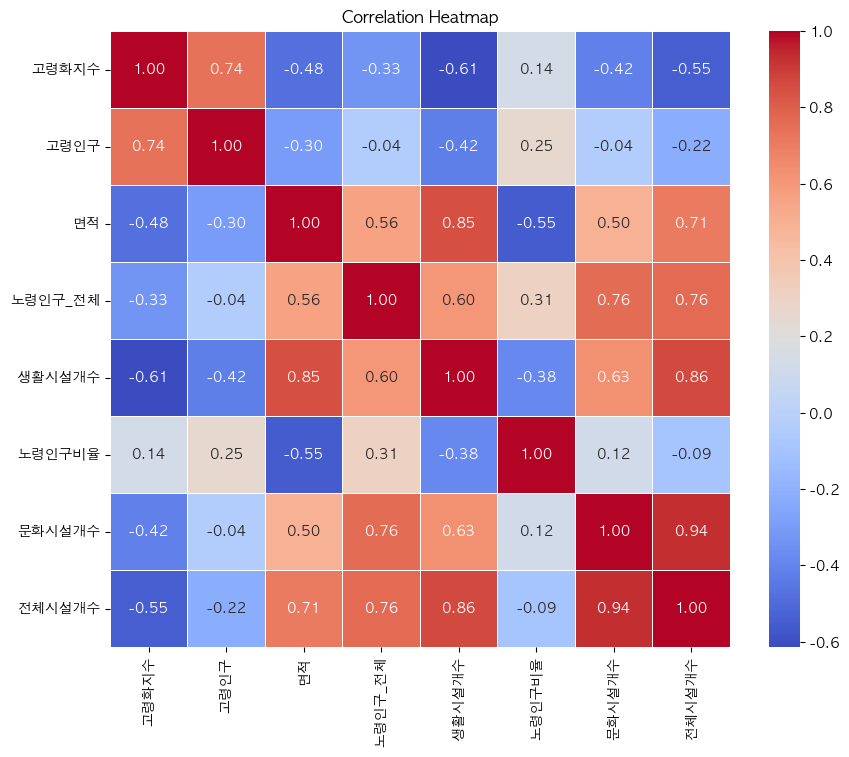

In [235]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 계산
correlation = total.iloc[:, 1:].corr()

# Heatmap 그리기
plt.figure(figsize=(10, 8))  # 그래프 크기 설정
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

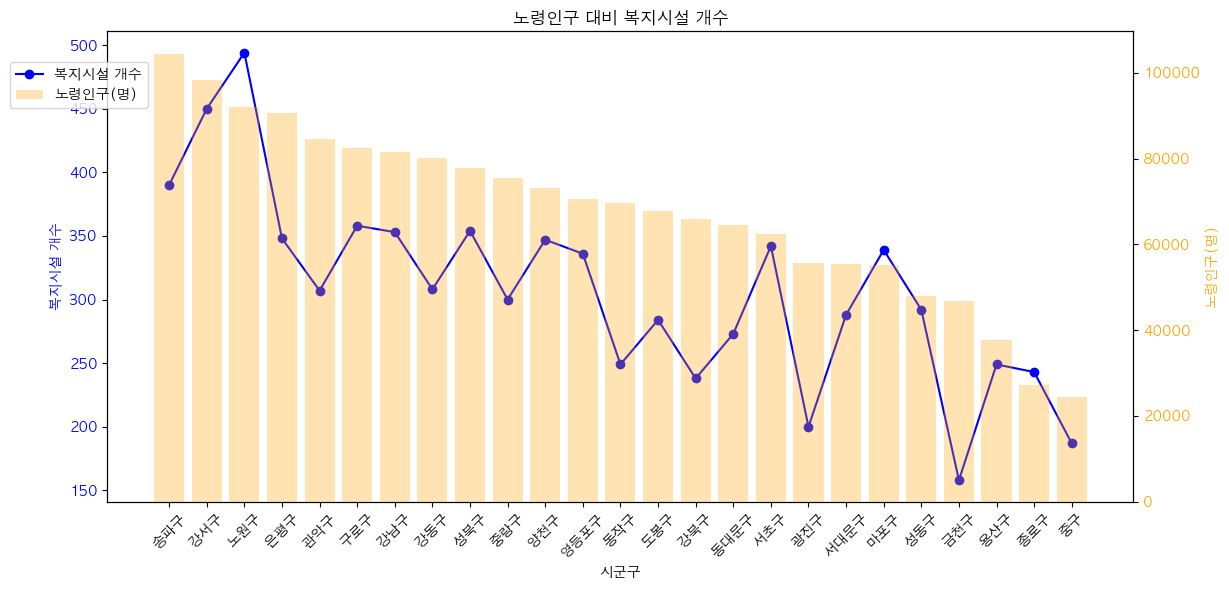

In [237]:
# 노령인구 기준 정렬
sorted_merge = total.sort_values(by='노령인구_전체', ascending=False)

# 그래프 생성
fig, ax1 = plt.subplots(figsize=(12, 6))

# 선그래프 (복지시설 개수)
ax1.plot(sorted_merge['SIGNGU_NM'], sorted_merge['전체시설개수'], marker='o', linestyle='-', color='b', label='복지시설 개수')
ax1.set_xlabel("시군구")
ax1.set_ylabel("복지시설 개수", color='b')
ax1.tick_params(axis='y', labelcolor='b')
plt.xticks(rotation=45)

# 막대그래프 (노령인구_전체)
ax2 = ax1.twinx()  # 두 번째 Y축 추가
ax2.bar(sorted_merge['SIGNGU_NM'], sorted_merge['노령인구_전체'], alpha=0.3, color='orange', label='노령인구(명)')
ax2.set_ylabel("노령인구(명)", color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# 그래프 타이틀 및 레전드
plt.title("노령인구 대비 복지시설 개수")
fig.tight_layout()  # 레이아웃 조정
fig.legend(loc="upper right", bbox_to_anchor=(0.1, 0.9))  # 범례 추가

# 그래프 출력
plt.show()
